# Google Gemini API

* 32K context window for text
* Free to use right now, within limits
* **Features supported:**
  * function calling
  * embeddings
  * semantic retrieval
  * custom knowledge grounding
  * chat functionality
* Supports 38 languages across 180+ countries
* **Gemini Pro** accepts text as input and generates text as output.
* **Gemini Pro Vision** takes text and image as input and procdues output as text

* **Official Notebook:** https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb
* **LangChain-Gemini Documentation:** https://python.langchain.com/docs/integrations/chat/google_generative_ai

## Pre-requisites

In [5]:
!pip install -q -U google-generativeai langchain-google-genai langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.0 MB/s eta 0:00:00


## Import Libraries

In [6]:
import pathlib
import textwrap
import getpass

import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Gemini-Pro API

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In [7]:
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API Key")

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

### Available Models

In [8]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Examples:
- Text Generation
- Prompt Template
- Summarization
- Objection Handling
- Output Parsing:
  - JSON using StructuredOutputParser
  - JSON using PyDantic

### Text Generation

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("Write 10 concise bullet points of a good sales agent in a call center")
to_markdown(result.content)

> - **Product Knowledge and Expertise**: Demonstrates a deep understanding of company products or services and their functionalities.
> - **Communication Skills**: Articulate, persuasive, and confident in explaining product benefits accurately and clearly.
> - **Active Listening**: Attentively listens to customer needs, concerns, and objections, providing tailored solutions accordingly.
> - **Empathy and Understanding**: Connects with customers on an emotional level, showing genuine care for their needs and building rapport.
> - **Problem-Solving Ability**: Quickly identifies and resolves customer issues, proactively offering alternative solutions and workarounds.
> - **Persuasion and Negotiation**: Effectively handles objections and challenges, responds strategically to customer inquiries while promoting products/services' value.
> - **Upselling and Cross-Selling**: Identifies opportunities to suggest complementary products or services, expanding sales and increasing customer satisfaction.
> - **Time Management and Organization**: Prioritizes tasks efficiently, optimizes time utilization, and keeps accurate records of customer interactions.
> - **Continuous Learning and Improvement**: Strives to stay updated with industry trends, new product releases, and best sales practices.
> - **Positive Attitude and Professionalism**: Maintains a positive and professional demeanor, cultivating a positive customer experience and resolving issues with integrity.

### Prompt Template
Learn to use LangChain's PromptTemplate with Gemini

In [13]:
# Basic Multi Chain
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.7)

prompt = ChatPromptTemplate.from_template(
    """
    Tell me about {topic} in two lines
    """
)
output_parser = StrOutputParser()
chain = prompt | llm | output_parser
display(to_markdown(chain.invoke({"topic": "Artificial Intelligence"})))

> 1. Artificial intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems.
> 2. AI research has the goal of creating intelligent machines that can perform tasks that typically require human intelligence.

### Summarization: Call Transcript


In [15]:
call_transcript = """Agent: Good afternoon. May I speak with Mr. Smith, please? Hello, Mr. Smith. This is Ms. Parker calling on behalf of Human Rights Advocates New Zealand. How are you today? I won't take much of your time, Mr. Smith. I wanted to provide you with a brief update, if I may. Customer: Yes, of course. Agent: Mr. Smith, are you familiar with the scope of our work at Human Rights Advocates? Customer: Not extensively, no. Agent: I see. That's acceptable. I do need to inform you that this call is being recorded for training purposes. Customer: Understood. Agent: Excellent. I believe we can agree that one's background or origin should not affect their rights. Do you concur? Customer: Yes. Agent: Indeed. Currently, we are diligently striving to bring about change in the systems operating in New Zealand. It's a substantial endeavor, as you might imagine. Customer: Agreed. Agent: Our aim is to aid individuals in crisis zones and advocate for those whose lives are jeopardized due to human rights violations. It's crucial that individuals aren't afraid to assist others in need. Customer: Absolutely. Agent: Precisely. We work towards influencing governmental bodies, organizations, and decision-makers to uphold everyone's rights. There's a significant amount of ongoing work in the background. Now, we'd like to extend an invitation to participate in our program. The process is straightforward: you have complete control over your contribution, its duration, and the flexibility to make adjustments as needed. Customer: I'm afraid I can't afford it at the moment. Agent: I completely understand, Mr. Smith. We acknowledge that this might not be the opportune time for everyone. Customer: Yes, exactly. Agent: Noted. Your input is valuable. We have individuals contributing as little as four dollars fifty cents per week, amounting to eighteen dollars a month. Would that be a feasible option for you? Customer: Yes, that sounds reasonable. Agent: Great to hear, Mr. Smith. However, I do understand your current situation. I appreciate your time today. Customer: Thank you as well. Agent: Have a splendid day. Thank you and goodbye. Your time is appreciated. Farewell and take care."""

In [17]:
prompt = ChatPromptTemplate.from_template(
    """
    Summarize the call transcript enclosed in triple backticks into a 6 line paragraph

    ```{transcript}```
    """
)
output_parser = StrOutputParser()
chain = prompt | llm | output_parser
display(to_markdown(chain.invoke({"transcript": call_transcript})))

> Ms. Parker from Human Rights Advocates New Zealand called Mr. Smith to provide an update on their work and invite him to participate in their program. Mr. Smith was unfamiliar with the organization's scope, but Ms. Parker explained that they strive to bring about change in systems operating in New Zealand, aid individuals in crisis zones, and advocate for those whose lives are jeopardized due to human rights violations. Mr. Smith agreed with the organization's aims but expressed that he could not afford to contribute at the moment. Ms. Parker understood and suggested a smaller contribution of four dollars fifty cents per week, which Mr. Smith found reasonable.

### Objection Handling: Call Transcript

In [39]:
import json

prompt = ChatPromptTemplate.from_template(
    """
    I've enclosed a call transcript within triple backticks for your review. Your task involves carefully analyzing the transcript to assess how effectively the agent handled objections from potential donors. Categorize the objections faced by the agent into specific categories:

      1. Situation: Determine if the donor mentioned personal circumstances hindering their ability to donate or anticipated changes in their situation. (Yes/No)
      2. Affordability: Identify whether the donor expressed financial constraints preventing them from making a donation. (Yes/No)
      3. Competitor Donation: Note if the caller mentioned regular donations to another charity. (Yes/No)
      4. Once Off: Recognize if the donor offered a one-time donation but declined regular contributions. (Yes/No)
      5. Alternate Funding: See if the caller suggested seeking funding elsewhere. (Yes/No)
      6. Channel Fear: Observe if the caller hesitated to provide payment details over the phone. (Yes/No)
      7. Explanation: If any objections were raised (answered "Yes"), provide a concise combined explanation in two lines. If there were no objections for all topics (answered "No"), simply state "No explanation needed."

    Please structure your response in a JSON format adhering to the pattern:

        {{
        "Situation": "",
        "Affordability": "",
        "Competitor Donation": "",
        "Once Off": "",
        "Alternate Funding": "",
        "Channel Fear": "",
        "Explanation": ""
        }}

    Ensure all questions are answered within the JSON as specified. Your response should cover all questions.

    ```{transcript}```
    """
)
output_parser = StrOutputParser()
chain = prompt | llm | output_parser
result = chain.invoke({"transcript": call_transcript})
display(to_markdown(result))

> ```JSON
> {
>   "Situation": "No",
>   "Affordability": "Yes",
>   "Competitor Donation": "No",
>   "Once Off": "No",
>   "Alternate Funding": "No",
>   "Channel Fear": "No",
>   "Explanation": "Mr. Smith initially expressed financial constraints, making it difficult to contribute regularly. However, he showed interest in a smaller, more manageable donation option."
> }
> ```

### Output Parsing: JSON using StructuredOutputParser

In [44]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

response_schemas = [
    ResponseSchema(name="Situation", description=""),
    ResponseSchema(name="Affordability", description=""),
    ResponseSchema(name="Competitor Donation", description=""),
    ResponseSchema(name="Once Off", description=""),
    ResponseSchema(name="Alternate Funding", description=""),
    ResponseSchema(name="Channel Fear", description=""),
    ResponseSchema(name="Explanation", description=""),
    ]

stru_output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"Situation": string  // 
	"Affordability": string  // 
	"Competitor Donation": string  // 
	"Once Off": string  // 
	"Alternate Funding": string  // 
	"Channel Fear": string  // 
	"Explanation": string  // 
}
```


In [49]:
import json

prompt = ChatPromptTemplate.from_template(
    """
    I've enclosed a call transcript within triple backticks for your review. Your task involves carefully analyzing the transcript to assess how effectively the agent handled objections from potential donors. Categorize the objections faced by the agent into specific categories:

      1. Situation: Determine if the donor mentioned personal circumstances hindering their ability to donate or anticipated changes in their situation. (Yes/No)
      2. Affordability: Identify whether the donor expressed financial constraints preventing them from making a donation. (Yes/No)
      3. Competitor Donation: Note if the caller mentioned regular donations to another charity. (Yes/No)
      4. Once Off: Recognize if the donor offered a one-time donation but declined regular contributions. (Yes/No)
      5. Alternate Funding: See if the caller suggested seeking funding elsewhere. (Yes/No)
      6. Channel Fear: Observe if the caller hesitated to provide payment details over the phone. (Yes/No)
      7. Explanation: If any objections were raised (answered "Yes"), provide a concise combined explanation in two lines. If there were no objections for all topics (answered "No"), simply state "No explanation needed."

    {format_instructions}

    ```{transcript}```
    """)

chain = prompt | llm | output_parser
result = chain.invoke({"transcript": call_transcript, "format_instructions" : format_instructions})
print("Post-Processing: Type of Output is", type(result))
display(result)

Post-Processing: Type of Output is <class 'dict'>


{'Situation': 'No',
 'Affordability': 'Yes',
 'Competitor Donation': 'No',
 'Once Off': 'No',
 'Alternate Funding': 'No',
 'Channel Fear': 'No',
 'Explanation': 'The donor, Mr. Smith, expressed financial constraints as the primary reason for his inability to make a regular donation.'}

### Output Parsing: JSON using Pydantic

In [53]:
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field, validator
from typing import List

# Define your desired data structure.
class ObjectionHandling(BaseModel):
    Situation: str = Field(description="")
    Affordability: str = Field(description="")
    Competitor_Donation: str = Field(description="")
    Once_Off: str = Field(description="")
    Alternate_Funding: str = Field(description="")
    Channel_Fear: str = Field(description="")
    Explanation: str = Field(description="")


    # You can add custom validation logic easily with Pydantic.
    @validator('Explanation')
    def explanation_length(cls, field):
        if len(field) < 2:
            raise ValueError("Badly Given Explanation")
        return field

# Set up a parser
pydantic_parser = PydanticOutputParser(pydantic_object=ObjectionHandling)

format_instructions = pydantic_parser.get_format_instructions()
print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Situation": {"title": "Situation", "type": "string"}, "Affordability": {"title": "Affordability", "type": "string"}, "Competitor_Donation": {"title": "Competitor Donation", "type": "string"}, "Once_Off": {"title": "Once Off", "type": "string"}, "Alternate_Funding": {"title": "Alternate Funding", "type": "string"}, "Channel_Fear": {"title": "Channel Fear", "type": "string"}, "Explanation": {"title": "Explanation", "type": "string"}}, "required": ["Situation", "Affordability", "Competitor_Donation", "Once_Off", "Alternate_Fundin

In [54]:
prompt = ChatPromptTemplate.from_template(
    """
    I've enclosed a call transcript within triple backticks for your review. Your task involves carefully analyzing the transcript to assess how effectively the agent handled objections from potential donors. Categorize the objections faced by the agent into specific categories:

      1. Situation: Determine if the donor mentioned personal circumstances hindering their ability to donate or anticipated changes in their situation. (Yes/No)
      2. Affordability: Identify whether the donor expressed financial constraints preventing them from making a donation. (Yes/No)
      3. Competitor Donation: Note if the caller mentioned regular donations to another charity. (Yes/No)
      4. Once Off: Recognize if the donor offered a one-time donation but declined regular contributions. (Yes/No)
      5. Alternate Funding: See if the caller suggested seeking funding elsewhere. (Yes/No)
      6. Channel Fear: Observe if the caller hesitated to provide payment details over the phone. (Yes/No)
      7. Explanation: If any objections were raised (answered "Yes"), provide a concise combined explanation in two lines. If there were no objections for all topics (answered "No"), simply state "No explanation needed."

    {format_instructions}

    ```{transcript}```
    """)

chain = prompt | llm | pydantic_parser
result = chain.invoke({"transcript": call_transcript, "format_instructions" : format_instructions})
print("Post-Processing: Type of Output is", type(result))
display(result)

Post-Processing: Type of Output is <class '__main__.ObjectionHandling'>


ObjectionHandling(Situation='No', Affordability='Yes', Competitor_Donation='No', Once_Off='No', Alternate_Funding='No', Channel_Fear='No', Explanation='The donor expressed financial constraints but showed interest in contributing a small amount due to their current situation.')

In [56]:
result.Explanation

'The donor expressed financial constraints but showed interest in contributing a small amount due to their current situation.'

## Streaming and Batching
* **Stream:** Provides real-time answer instead of waiting for entire output
* **Batch:** Could taclke more than 1 prompts at a time

In [ ]:
# STREAM
for chunk in llm.stream("Write a 5 line poem"):
    display(to_markdown(chunk.content))
    display(to_markdown("---"))

> In twilight's embrace,
> A canvas painted anew,
> Hues of

> ---

>  gold and rose,
> Silent symphonies unfold,
> Where dreams take flight.

> ---

In [ ]:
# BATCH
results = llm.batch(
    [
        "What is name of CEO of Google?",
        "What is name of CEO of Microsoft?",
    ]
)

for res in results:
    display(to_markdown(res.content))

> Sundar Pichai

> Satya Nadella

## Safety Settings and Candidates
Gemini API enables developers to adjust safety settings on the following 4 areas:

* Harassment
* Hate speech
* Sexually explicit
* Dangerous

Following are the levels of these safety measures. By default responses for prompts with High or Medium levels are blocked:

* Negligible
* Low
* Medium
* High

Read more at:
* <a class="button button-primary" href="https://ai.google.dev/api/rest/v1beta/HarmCategory" target="_blank" rel="noopener noreferrer">Harm Category</a>
* <a class="button button-primary" href="https://ai.google.dev/api/rest/v1beta/SafetyRating#HarmProbability" target="_blank" rel="noopener noreferrer">Harm Probability</a>

Candidates are basically multiple outputs for the same prompt. Original Gemini-Pro methods that can check Safety and Candidates are:
* response.prompt_feedback
* response.candidates

Need to search more to call these from within LangChain


In [ ]:
result = llm.invoke("Write 10 concise bullet points to rob a bank")
to_markdown(result.content)

BlockedPromptException: ignored

## Image Recognition

In [ ]:
! pip install pillow -q

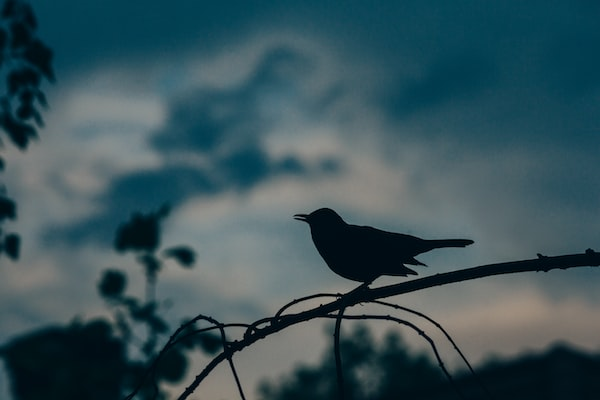

In [ ]:
import requests
from IPython.display import Image

image_url = "https://images.unsplash.com/photo-1463003160077-801f9fd8d095?q=80&w=600"
content = requests.get(image_url).content
Image(content)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image? What mood does the image represents?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)

output_message = llm.invoke([message])
content_text = to_markdown(output_message.content)
content_text

>  The image is a silhouette of a bird on a branch against a dark sky. The mood of the image is dark and mysterious. The bird is alone and isolated, and the dark sky suggests that there is a storm coming. The image is also very still, which adds to the sense of suspense.

## Configuring Hyperparameters with GenerationConfig

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

**Note:** Need to figure out a way to do it with LangChain too

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Tell me in 2 lines concisely, why Newton could be better than Einstein?",
                                  generation_config=genai.types.GenerationConfig(
                                  candidate_count=1,
                                  stop_sequences=['.'],
                                  max_output_tokens=20,
                                  top_p = 0.7,
                                  top_k = 4,
                                  temperature=0.7)
                                  )
to_markdown(response.text)

> Newton's laws are simpler and more intuitive, while Einstein's theories are more complex and require

- **candidate_count=1:** Tells the Gemini to generate only one response per Prompt/Query. As discussed before, right now Google limits the number of candidates to 1
- **stop_sequences=[‘.’]:** Tells Gemini to stop generating text when it encounters a period (.)
- **max_output_tokens=20:** Limits the generated text to a specified maximum number which here is set to 20
- **top_p = 0.7:** Influences how likely the next word will be chosen based on its probability. 0.7 favors more probable words, while higher values favor less likely but potentially more creative choices
- **top_k = 4:** Considers only the top 4 most likely words when selecting the next word, promoting diversity in the output
- **temperature=0.7:** Controls the randomness of the generated text. A higher temperature (like 0.7) increases randomness and creativity, while lower values favor more predictable and conservative outputs

### What's Next?

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).